<h1 style="color : red; text-align:center; font-size:40px;">Deep Learning for Real Estate Price Prediction </h1>


# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

In this project, we will predict real estat prices using artificial neural
networks.
Dataset includes house sale prices for king Country in USA and homes that 
are sold in the time periode between May, 2014 and May 2015

Columns:

id: notation for a house

date: Date house was sold

price: Price is prediction target

bedrooms: Number of Bedrooms/House

bathrooms: Number of bathrooms/House

sqft_living: square footage of the home

sqft_lot: square footage of the lot

floors: Total floors (levels) in house

waterfront: House which has a view to a waterfront

view: Has been viewed

Data Source: https://www.kaggle.com/harlfoxem/housesalesprediction

condition: How good the condition is

grade: overall grade given to the housing unit, based on King County grading system

sqft_abovesquare: footage of house apart from basement

sqft_basement: square footage of the basement

yr_built: Built Year

yr_renovated: Year when house was renovated

zipcode: zip

lat: Latitude coordinate

long: Longitude coordinate

sqft_living15: Living room area in 2015(implies some renovations)

sqft_lot15: lot Size area in 2015 (implies some renovations)

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

C:\Users\USER\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
house_df = pd.read_csv('realestate_prices.csv')
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
house_df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
house_df.tail(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21603,7852140040,20140825T000000,507250.0,3,2.50,2270,5536,2.0,0,0,...,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21604,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,...,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21605,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
21607,2997800021,20150219T000000,475000.0,3,2.50,1310,1294,2.0,0,0,...,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [5]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# TASK #3: PERFORM DATA VISUALIZATION

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

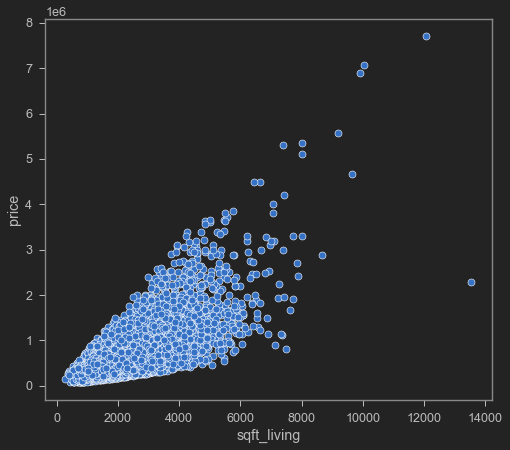

In [7]:
sns.scatterplot(x = 'sqft_living', y = 'price', data = house_df)

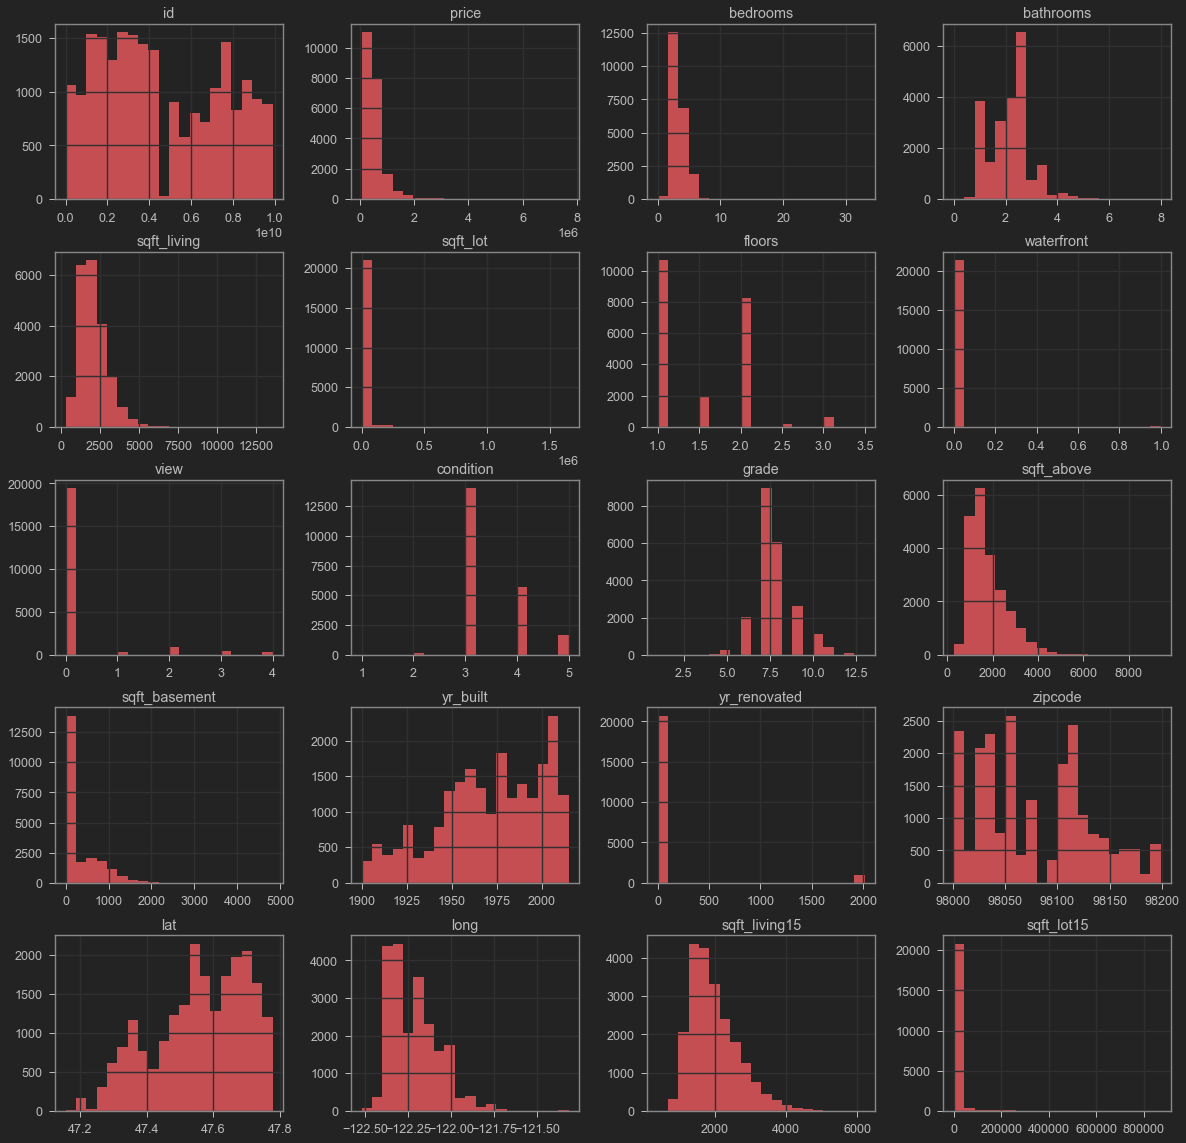

In [8]:
house_df.hist(bins = 20, figsize = (20,20), color = 'r');

<AxesSubplot:>

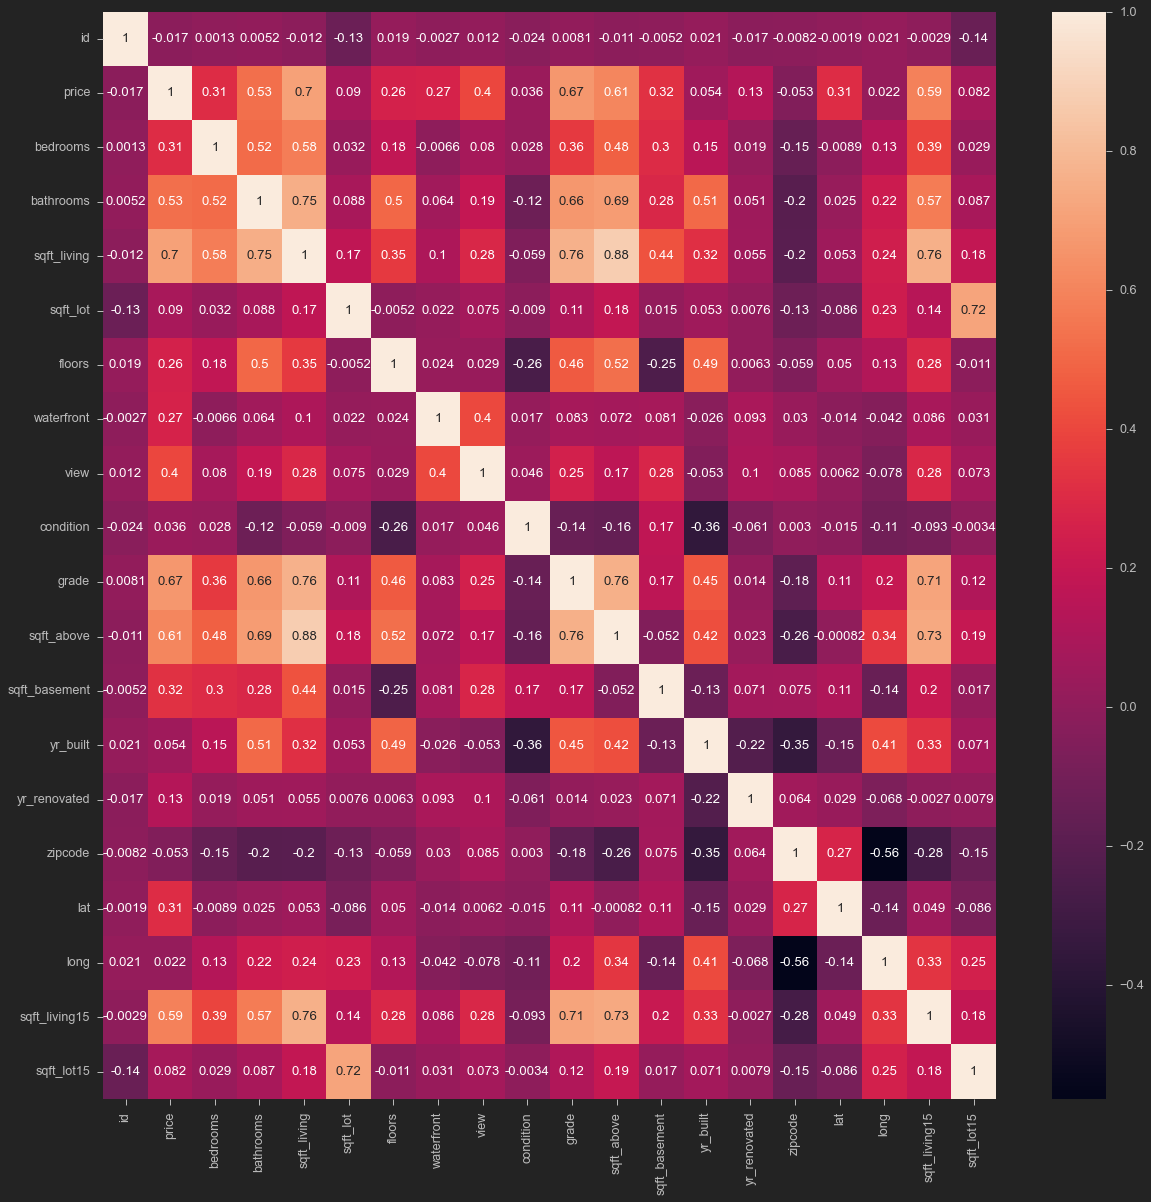

In [9]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(house_df.corr(), annot = True)

In [10]:
house_df_sample = house_df[ ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built']   ]

In [11]:
house_df_sample

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built
0,221900.0,3,1.00,1180,5650,1180,0,1955
1,538000.0,3,2.25,2570,7242,2170,400,1951
2,180000.0,2,1.00,770,10000,770,0,1933
3,604000.0,4,3.00,1960,5000,1050,910,1965
4,510000.0,3,2.00,1680,8080,1680,0,1987
...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,1530,0,2009
21609,400000.0,4,2.50,2310,5813,2310,0,2014
21610,402101.0,2,0.75,1020,1350,1020,0,2009
21611,400000.0,3,2.50,1600,2388,1600,0,2004


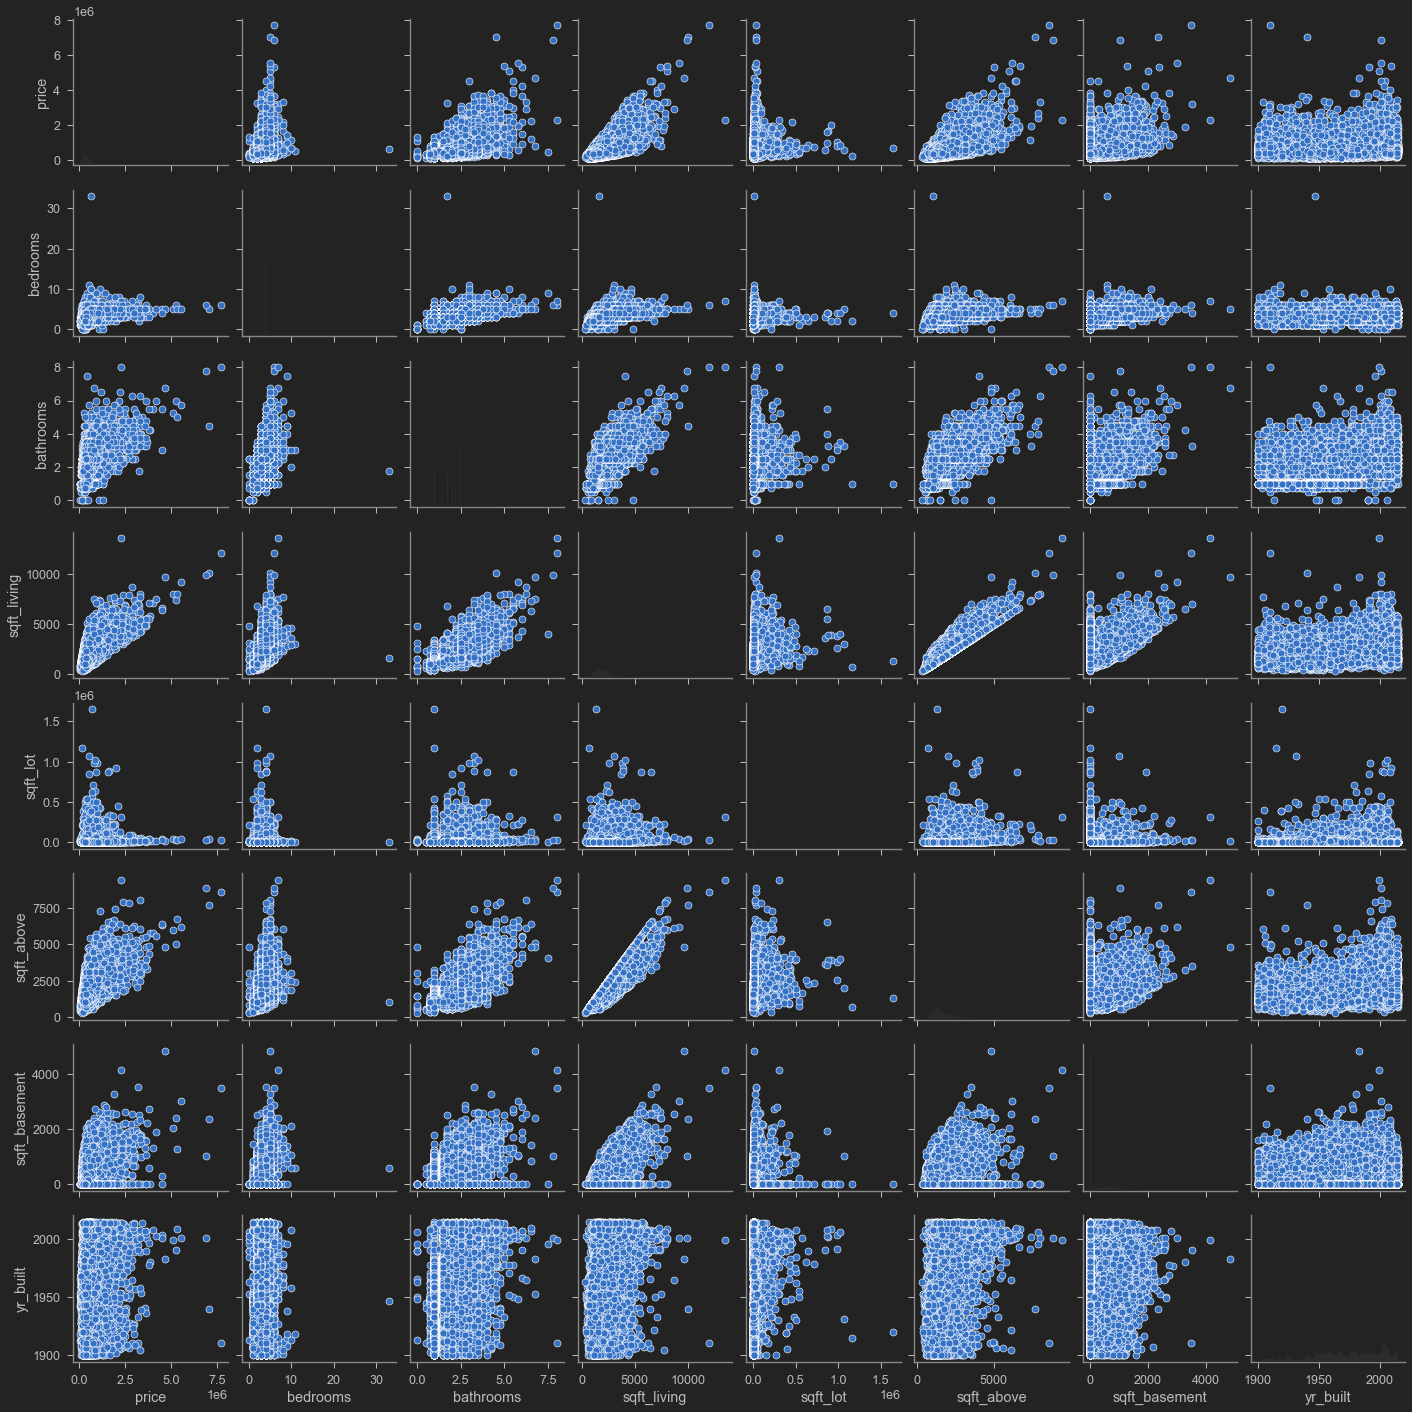

In [12]:
#Using Seaborn, plot the pairplot for the features contained in "house_df_sample"
sns.pairplot(house_df_sample)

# TASK #4: PERFORM DATA CLEANING AND FEATURE ENGINEERING

In [13]:
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']

In [14]:
X = house_df[selected_features]
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement
0,3,1.00,1180,5650,1.0,1180,0
1,3,2.25,2570,7242,2.0,2170,400
2,2,1.00,770,10000,1.0,770,0
3,4,3.00,1960,5000,1.0,1050,910
4,3,2.00,1680,8080,1.0,1680,0
...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,1530,0
21609,4,2.50,2310,5813,2.0,2310,0
21610,2,0.75,1020,1350,2.0,1020,0
21611,3,2.50,1600,2388,2.0,1600,0


In [15]:
y = house_df['price']
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [16]:
X.shape 

(21613, 7)

In [17]:
y.shape

(21613,)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
X_scaled

array([[0.09090909, 0.125     , 0.06716981, ..., 0.        , 0.09758772,
        0.        ],
       [0.09090909, 0.28125   , 0.17207547, ..., 0.4       , 0.20614035,
        0.08298755],
       [0.06060606, 0.125     , 0.03622642, ..., 0.        , 0.05263158,
        0.        ],
       ...,
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ],
       [0.09090909, 0.3125    , 0.09886792, ..., 0.4       , 0.14364035,
        0.        ],
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ]])

In [20]:
X_scaled.shape

(21613, 7)

In [21]:
scaler.data_max_

array([3.300000e+01, 8.000000e+00, 1.354000e+04, 1.651359e+06,
       3.500000e+00, 9.410000e+03, 4.820000e+03])

In [22]:
scaler.data_min_

array([  0.,   0., 290., 520.,   1., 290.,   0.])

In [23]:
y = y.values.reshape(-1,1)

In [24]:
y_scaled = scaler.fit_transform(y)

In [25]:
y_scaled

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

# TASK #5: TRAIN A DEEP LEARNING MODEL WITH LIMITED NUMBER OF FEATURES

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [27]:
X_train.shape

(16209, 7)

In [28]:
X_test.shape

(5404, 7)

In [29]:
#!pip install tensorflow


In [30]:
import tensorflow.keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(100, input_dim = 7, activation = 'relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation = 'linear'))

C:\Users\USER\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,101 (82.43 KB)

 Trainable params: 21,101 (82.43 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [35]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split = 0.2)

Epoch 1/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 2/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - loss: 9.6039e-04 - val_loss: 0.0010
Epoch 3/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - loss: 0.0011 - val_loss: 0.0011
Epoch 4/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - loss: 9.4850e-04 - val_loss: 0.0010
Epoch 5/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - loss: 0.0011 - val_loss: 0.0011
Epoch 6/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - loss: 9.5506e-04 - val_loss: 0.0010
Epoch 7/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - loss: 9.4823e-04 - val_loss: 0.0010
Epoch 8/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - loss: 9.7491e-04 - val_loss: 0.0010
Epoch 9/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - loss: 9.3164e-04 - val_loss: 0.0013
Epoch 10/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - loss: 9.8412e-04 - val_loss: 0.0010
Epoch 11/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - loss: 0.0010 - val_loss: 

260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - loss: 8.7718e-04 - val_loss: 0.0010
Epoch 65/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - loss: 8.9152e-04 - val_loss: 0.0010
Epoch 66/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - loss: 8.8968e-04 - val_loss: 0.0010
Epoch 67/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - loss: 8.8312e-04 - val_loss: 9.9876e-04
Epoch 68/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - loss: 8.3532e-04 - val_loss: 0.0010
Epoch 69/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - loss: 9.0710e-04 - val_loss: 0.0010
Epoch 70/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - loss: 8.3764e-04 - val_loss: 9.9319e-04
Epoch 71/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - loss: 7.9974e-04 - val_loss: 9.9988e-04
Epoch 72/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - loss: 8.4931e-04 - val_loss: 0.0010
Epoch 73/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - loss: 8.1645e-04 - val_loss: 0.0011
Epoch 74/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - los

Change the architecture of the network by adding an additional dense layer with 200 neurons. Use "Relu" as an activation function
How many trainable parameters does the new network has

In [36]:
import tensorflow.keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(100, input_dim = 7, activation = 'relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation = 'linear'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 100)                 │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,401 (161.72 KB)

 Trainable params: 41,401 (161.72 KB)

 Non-trainable params: 0 (0.00 B)

# TASK #6: EVALUATE TRAINED DEEP LEARNING MODEL PERFORMANCE 

In [37]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

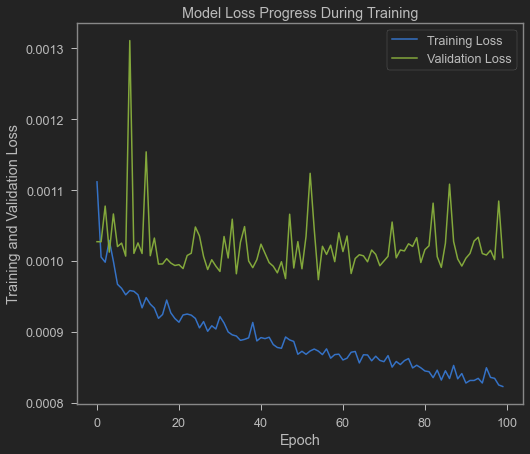

In [38]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

In [39]:
# 'bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement'
X_test_1 = np.array([[ 4, 3, 1960, 5000, 1, 2000, 3000 ]])

scaler_1 = MinMaxScaler()
X_test_scaled_1 = scaler_1.fit_transform(X_test_1)

y_predict_1 = model.predict(X_test_scaled_1)

y_predict_1 = scaler.inverse_transform(y_predict_1)
y_predict_1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[75000.]], dtype=float32)

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step


Text(0, 0.5, 'True Values')

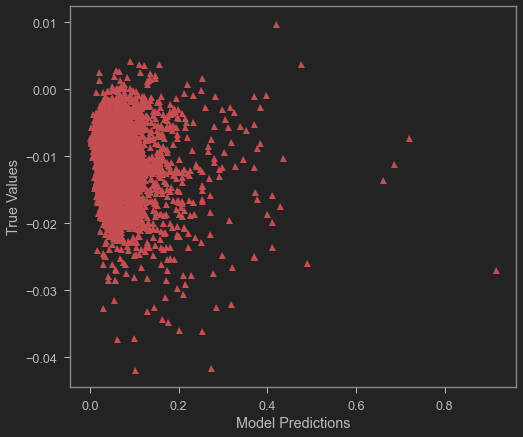

In [40]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [41]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)


(0.0, 3000000.0)

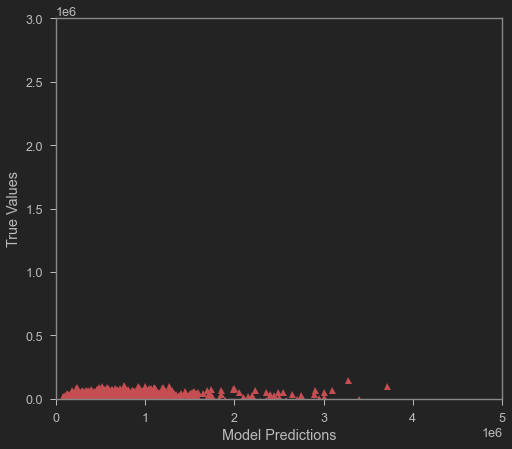

In [42]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

In [43]:
k = X_test.shape[1]
n = len(X_test)
n

5404

In [44]:
k

7

In [45]:

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 674500.546 
MSE = 454950986937.50183 
MAE = 550990.156729066 
R2 = -2.102731714468971 
Adjusted R2 = -2.106756755610795


# TASK #7. TRAIN AND EVALUATE A DEEP LEARNING MODEL WITH INCREASED NUMBER OF FEATURES (INDEPENDANT VARIABLES)

In [46]:
selected_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 
'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

X = house_df[selected_features]

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [48]:
y = house_df['price']

In [49]:
y = y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [50]:
import tensorflow.keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(10, input_dim = 19, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

C:\Users\USER\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [52]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, verbose = 1, validation_split = 0.2)

Epoch 1/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step - loss: 0.0071 - val_loss: 0.0018
Epoch 2/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - loss: 0.0012 - val_loss: 0.0012
Epoch 3/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - loss: 8.7225e-04 - val_loss: 9.7840e-04
Epoch 4/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - loss: 7.5226e-04 - val_loss: 8.3857e-04
Epoch 5/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - loss: 6.4476e-04 - val_loss: 7.3303e-04
Epoch 6/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - loss: 5.8122e-04 - val_loss: 7.0362e-04
Epoch 7/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - loss: 5.6896e-04 - val_loss: 6.5892e-04
Epoch 8/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - loss: 5.6805e-04 - val_loss: 6.4953e-04
Epoch 9/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - loss: 4.9910e-04 - val_loss: 6.2541e-04
Epoch 10/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - loss: 5.5795e-04 - val_loss: 6.2071e-04
Epoch 11/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 

260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - loss: 3.3319e-04 - val_loss: 4.7271e-04
Epoch 64/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - loss: 3.0628e-04 - val_loss: 4.4747e-04
Epoch 65/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - loss: 3.1199e-04 - val_loss: 4.5930e-04
Epoch 66/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 3.0103e-04 - val_loss: 4.4578e-04
Epoch 67/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - loss: 3.0080e-04 - val_loss: 4.4737e-04
Epoch 68/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 3.0948e-04 - val_loss: 4.3526e-04
Epoch 69/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - loss: 3.1315e-04 - val_loss: 4.3751e-04
Epoch 70/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - loss: 2.9219e-04 - val_loss: 4.4988e-04
Epoch 71/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - loss: 3.0641e-04 - val_loss: 4.5541e-04
Epoch 72/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 3.1109e-04 - val_loss: 4.5640e-04
Epoch 73/100
260/260 ━━━━━━━━━━━━

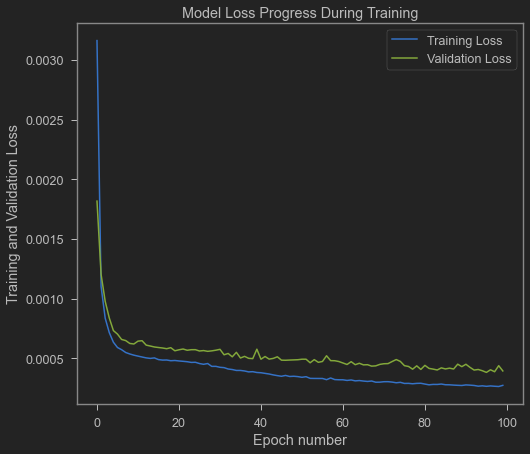

In [53]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch number')
plt.legend(['Training Loss', 'Validation Loss'])

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step


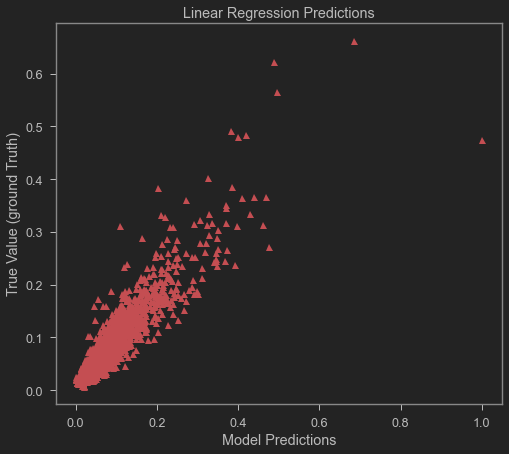

In [54]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Linear Regression Predictions')
plt.show()

In [55]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)


In [56]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 145746.884 
MSE = 21242154196.58611 
MAE = 80948.04489006985 
R2 = 0.8565002312962788 
Adjusted R2 = 0.8563140751841725
